In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from matplotlib.colors import Normalize
from scipy import stats as sps

## Процессы: траектории и сечения

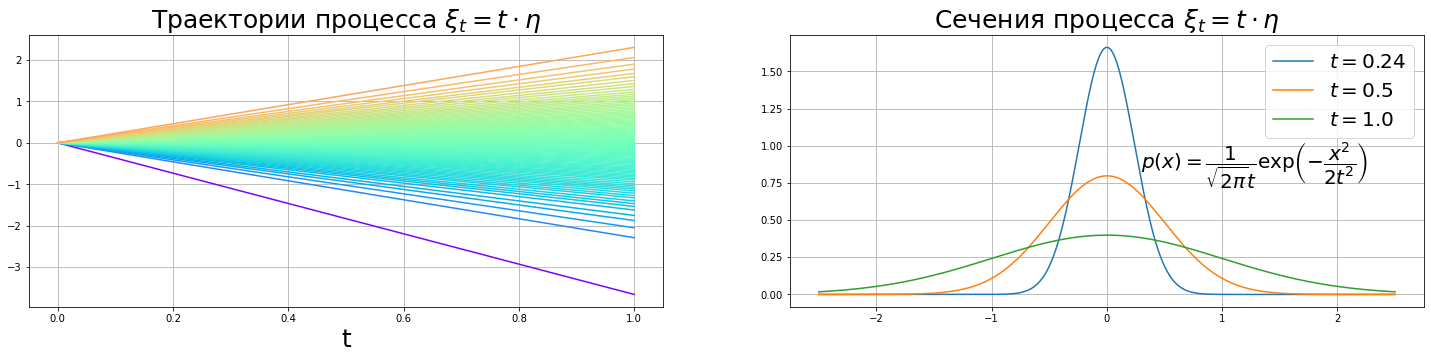

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from matplotlib.colors import Normalize
from scipy import stats as sps

N = 10000
np.random.seed(1)
eta = np.random.randn(N)
eta = np.sort(eta)  # Сортируем eta для плавного градиента
t = np.linspace(0, 1, 51).reshape(-1, 1)
xi = eta * t  # Умножаем вектор t на каждый элемент eta

# Нормализуем eta в диапазон [0, 1] для цветовой карты
norm = Normalize(vmin=eta.min(), vmax=eta.max())
colors = rainbow(norm(eta))

# Создаем график
fig, ax = plt.subplots(1, 2, figsize=(25, 5))
ax[0].set_title(r"Траектории процесса $\xi_t = t\cdot \eta$", fontsize=25)
ax[0].set_xlabel("t", fontsize=25)
for i in range(0, N, N // 100):
    ax[0].plot(t, xi[:, i], color=colors[i])
ax[0].grid()

ax[1].set_title(r"Сечения процесса $\xi_t = t\cdot \eta$", fontsize=25)
inds = [len(t) // 4, len(t) // 2, len(t) - 1]
xx = np.linspace(-2.5, 2.5, 1000)
for i in inds:
    ax[1].plot(xx, sps.norm.pdf(xx, scale=t[i]), label=fr'$t=${t[i, 0]}')
ax[1].legend(fontsize=20)
ax[1].grid()
ax[1].text(0.3, 0.85, r"$p(x) = \dfrac{1}{\sqrt{2\pi} t}\exp\left(-\dfrac{x^2}{2t^2}\right)$", fontsize=20)


plt.show()
fig.savefig("../1_figs/process_example_1.png")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from matplotlib.colors import Normalize
from scipy import stats as sps

N = 1000000
nt = 100
np.random.seed(3)
u = np.random.rand(nt, N)
xi = 2 * (u >= 0.5) - 1
X = np.cumsum(xi, axis=0)
X = np.concatenate((np.zeros((1, N)), X))
X = X[:, np.argsort(X[-1])]
X = X[:, N // 100 : -N // 100]

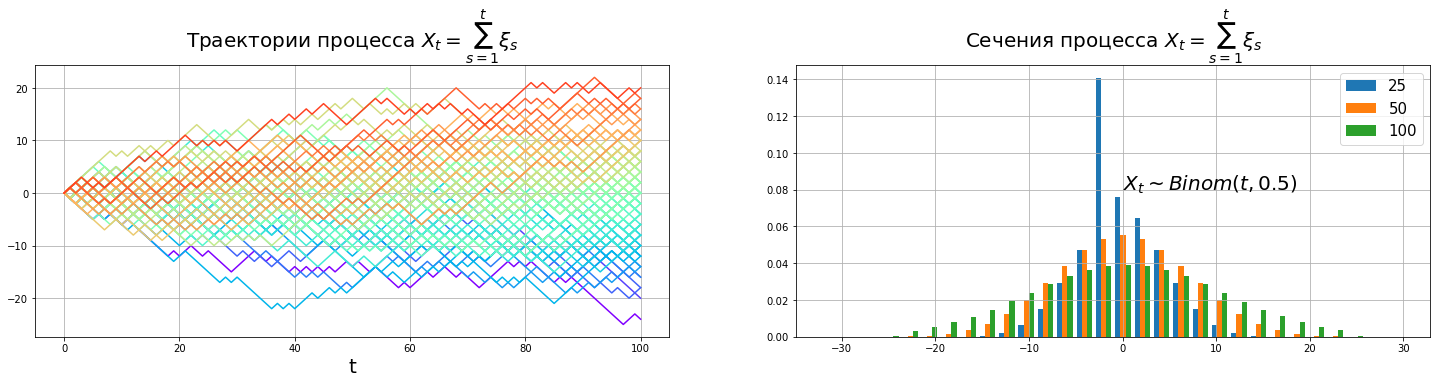

In [5]:
t = np.arange(nt + 1).reshape(-1, 1)
# Нормализуем eta в диапазон [0, 1] для цветовой карты
norm = Normalize(vmin=X[-1].min(), vmax=X[-1].max())
colors = rainbow(norm(X[-1]))

# Создаем график
fig, ax = plt.subplots(1, 2, figsize=(25, 5))
ax[0].set_title(r"Траектории процесса $X_t = \sum_{s=1}^t \xi_s$", fontsize=20)
ax[0].set_xlabel("t", fontsize=20)
for i in range(0, len(X[-1]), len(X[-1]) // 100):
    ax[0].plot(t, X[:, i], color=colors[i])
ax[0].grid()

ax[1].set_title(r"Сечения процесса $X_t = \sum_{s=1}^t \xi_s$", fontsize=20)
inds = [len(t) // 4, len(t) // 2, len(t) - 1]
xx = np.linspace(-20, 20, 100)
ax[1].hist(X[inds].T, bins=30, density=True)
ax[1].text(0, 0.08, r"$X_t\sim Binom(t, 0.5)$", fontsize=20)
#for i in inds:
    #ax[1].plot(xx, sps.gaussian_kde(X[i])(xx), label=fr'$t=${t[i, 0]}')
#    ax[1].hist(X[i], bins=30, label=fr'$t=${t[i, 0]}')
ax[1].legend(t[inds, 0], fontsize=15)
ax[1].grid()


plt.show()
fig.savefig("../1_figs/process_example_2.png")

In [6]:
import numba as nb

@nb.njit
def stop_process(X, b):
    X_stopped = X.copy()
    for j in range(X.shape[1]):
        itau = -1
        for i in range(X.shape[0]):
            if itau < 0:
                if X_stopped[i, j] >= b:
                    itau = i
            else:
                X_stopped[i, j] = X_stopped[itau, j]
                
    return X_stopped

In [9]:
X_stopped = stop_process(X, 10)

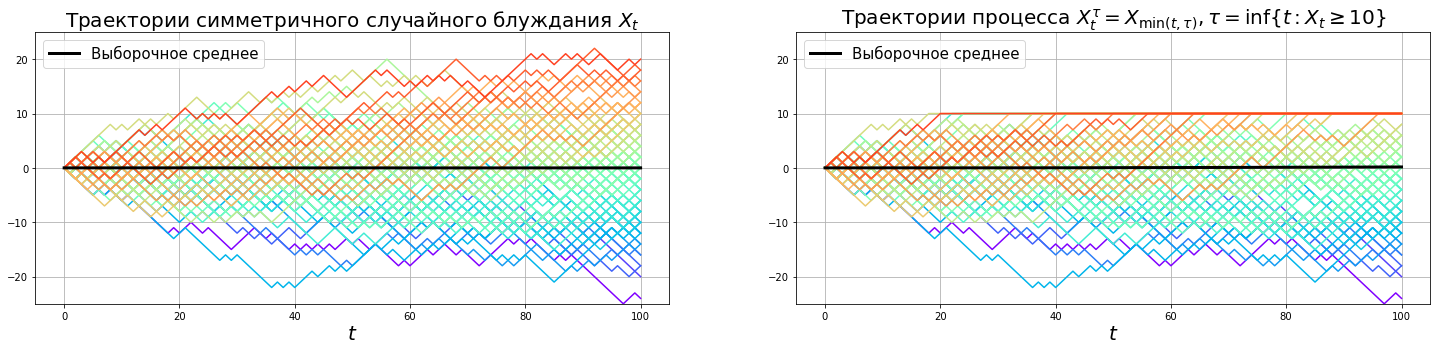

In [10]:
t = np.arange(nt + 1).reshape(-1, 1)
# Нормализуем eta в диапазон [0, 1] для цветовой карты
norm = Normalize(vmin=X[-1].min(), vmax=X[-1].max())
colors = rainbow(norm(X[-1]))

# Создаем график
fig, ax = plt.subplots(1, 2, figsize=(25, 5))
ax[0].set_title(r"Траектории симметричного случайного блуждания $X_t$", fontsize=20)
ax[0].set_xlabel(r"$t$", fontsize=20)
for i in range(0, len(X[-1]), len(X[-1]) // 100):
    ax[0].plot(t, X[:, i], color=colors[i])
ax[0].plot(t, X.mean(axis=1), color='black', lw=3, label='Выборочное среднее')
ax[0].legend(fontsize=15, loc=2)
ax[0].grid()
ax[0].set_ylim(-25, 25)
ax[1].set_ylim(-25, 25)

ax[1].set_title(r"Траектории процесса $X_t^{\tau} = X_{\min(t, \tau)}, \tau=\inf\{t : X_t \geq 10\}$", fontsize=20)
ax[1].set_xlabel(r"$t$", fontsize=20)
for i in range(0, len(X[-1]), len(X[-1]) // 100):
    ax[1].plot(t, X_stopped[:, i], color=colors[i])
ax[1].plot(t, X_stopped.mean(axis=1), color='black', lw=3, label='Выборочное среднее')
ax[1].legend(fontsize=15, loc=2)
ax[1].grid()


plt.show()
fig.savefig("../1_figs/stopped_process.png")

In [11]:
N = 1000
nt = 10000
np.random.seed(3)
u = np.random.rand(nt, N)
xi = 2 * (u >= 0.5) - 1
X = np.cumsum(xi, axis=0)
X = np.concatenate((np.zeros((1, N)), X))
X = X[:, np.argsort(X[-1])]
X = X[:, N // 100 : -N // 100]

T = 10

Nts = [10, 100, 1000]

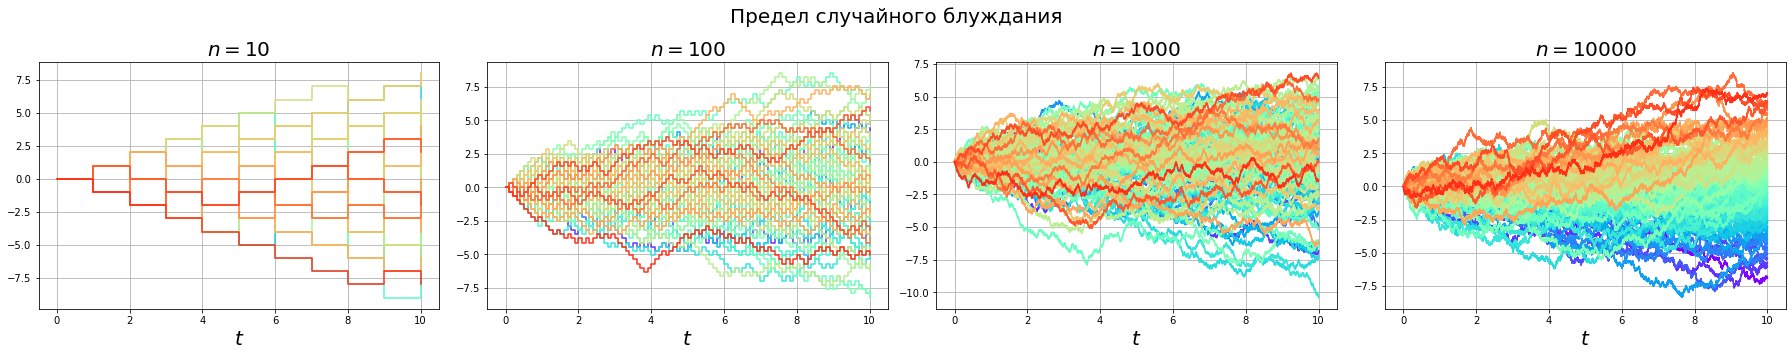

In [13]:
t = np.arange(nt + 1).reshape(-1, 1)
# Нормализуем eta в диапазон [0, 1] для цветовой карты
norm = Normalize(vmin=X[-1].min(), vmax=X[-1].max())
colors = rainbow(norm(X[-1]))


# Создаем график
fig, ax = plt.subplots(1, 4, figsize=(25, 5))
plt.suptitle("Предел случайного блуждания", fontsize=20)
Nts = [10, 100, 1000, 10000]
for j, Nt in enumerate(Nts):
    tau = T / Nt
    ax[j].set_title(fr"$n={Nt}$", fontsize=20)
    ax[j].set_xlabel(r"$t$", fontsize=20)
    for i in range(0, len(X[-1]), len(X[-1]) // 100):
        ax[j].step(t[:Nt + 1, 0] * tau, X[:Nt + 1, i] * np.sqrt(tau), color=colors[i], where='post')
    ax[j].grid()
fig.tight_layout()
plt.show()
fig.savefig("../2_figs/random_walk_limit.png")

## Процессы Ито

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from matplotlib.colors import Normalize
from scipy import stats as sps

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [15]:
def sample_bm(tn, nsim, mu=0, sigma=1):
    nt = len(tn) - 1
    eps = np.random.randn(nt, nsim) * np.sqrt(np.diff(tn)).reshape(-1, 1)
    X = np.cumsum(eps, axis=0)
    X = np.concatenate((np.zeros((1, nsim)), X))
    X = X * sigma + mu * tn.reshape(-1, 1)
    return X

def sample_gbm(tn, nsim, x0, mu, sigma):
    b = sample_bm(tn, nsim, mu - 0.5 * sigma, sigma)
    return x0 * np.exp(b)

def sample_ou(tn, nsim, x0, theta, alpha, sigma):
    nt = len(tn) - 1
    res = np.zeros((nt + 1, nsim))
    for t in range(nt):
        dt = tn[t + 1] - tn[t]
        e = np.exp(-alpha * dt)
        m = res[t] * e + theta * (1 - e)
        sig = sigma * np.sqrt((1 - e ** 2) / (2 * alpha))
        res[t + 1] = m + sig * np.random.randn(nsim)
    return res

def sample_bridge(tn, nsim, x0, T):
    nt = len(tn) - 1
    res = np.zeros((nt + 1, nsim))
    w = 0
    for t in range(nt):
        dt = tn[t + 1] - tn[t]
        eps = np.sqrt(dt) * np.random.randn(nsim)
        res[t + 1] = res[t] - w * dt + (T - tn[t]) * eps 
        w += eps
    return res


def sample_true_bridge(tn, nsim):
    nt = len(tn) - 1
    res = np.zeros((nt + 1, nsim))
    for t in range(nt):
        dt = tn[t + 1] - tn[t]
        eps = np.sqrt(dt) * np.random.randn(nsim)
        res[t + 1] = res[t] - res[t] / (1 - tn[t]) * dt + eps
    return res

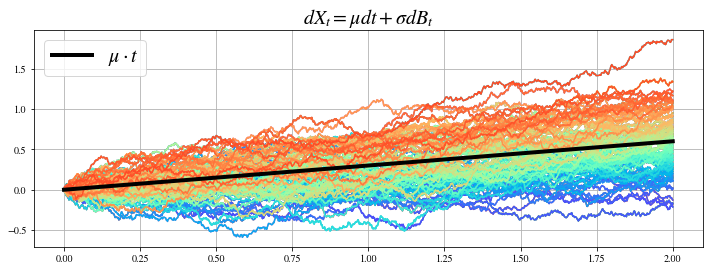

In [16]:
tn = np.linspace(0, 2, 1001)
nsim = 100
x0 = 1
mu = 0.3
sig = 0.3
X = sample_bm(tn, nsim, mu, sig)
ind = np.argsort(X[-1])
X = X[:, ind]

# Нормализуем eta в диапазон [0, 1] для цветовой карты
colors = rainbow(np.linspace(0.1, 0.9, nsim))

# Создаем график
fig = plt.figure(figsize=(12, 4))
plt.title(r"$dX_t = \mu dt + \sigma dB_t$", fontsize=20)
plt.plot(tn, X)
for i in range(len(X[-1])):
    plt.plot(tn, X[:, i], color=colors[i], alpha=1)
plt.plot(tn, mu * tn, color='black', lw=4, label=r'$\mu \cdot t$')
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
fig.tight_layout()
fig.savefig("../2_figs/BM with drift.png")

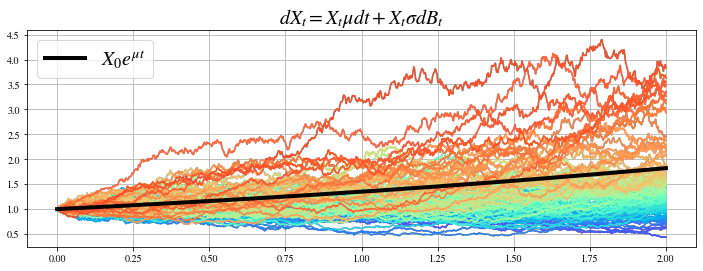

In [17]:
tn = np.linspace(0, 2, 1001)
nsim = 100
x0 = 1
mu = 0.3
sig = 0.3
X = sample_gbm(tn, nsim, x0, mu, sig)
ind = np.argsort(X[-1])
X = X[:, ind]

# Нормализуем eta в диапазон [0, 1] для цветовой карты
colors = rainbow(np.linspace(0.1, 0.9, nsim))

# Создаем график
fig = plt.figure(figsize=(12, 4))
plt.title(r"$dX_t = X_t \mu dt + X_t \sigma dB_t$", fontsize=20)
plt.plot(tn, X)
for i in range(len(X[-1])):
    plt.plot(tn, X[:, i], color=colors[i], alpha=1)
plt.plot(tn, np.exp(mu * tn), color='black', lw=4, label=r'$X_0e^{\mu t}$')
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
fig.tight_layout()
fig.savefig("../2_figs/GBM.png")

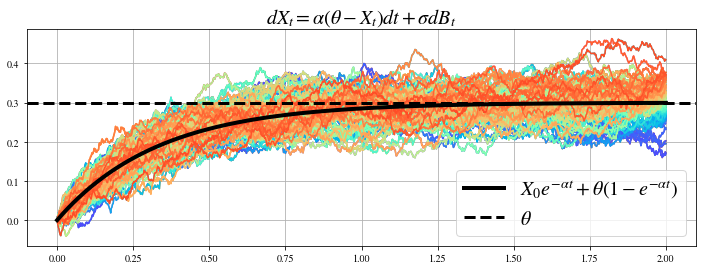

In [18]:
tn = np.linspace(0, 2, 1001)
nsim = 100
T = 1.0
x0 = 0
theta = 0.3
alpha = 3
sigma = 0.1
X = sample_ou(tn, nsim, x0, theta, alpha, sigma)

expectation = x0 * np.exp(-tn * alpha) + theta * (1 - np.exp(-tn * alpha))

ind = np.argsort(X[-1])
X = X[:, ind]

# Нормализуем eta в диапазон [0, 1] для цветовой карты
colors = rainbow(np.linspace(0.1, 0.9, nsim))

# Создаем график
fig = plt.figure(figsize=(12, 4))
plt.title(r"$dX_t = \alpha (\theta - X_t) dt + \sigma dB_t$", fontsize=20)
plt.plot(tn, X)
for i in range(len(X[-1])):
    plt.plot(tn, X[:, i], color=colors[i], alpha=1)
plt.plot(tn, expectation, color='black', lw=4, label=r'$X_0e^{-\alpha t} + \theta (1-e^{-\alpha t})$')
plt.axhline(theta, label=r'$\theta$', color='black', linestyle='--', lw=3)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
fig.tight_layout()
fig.savefig("../2_figs/OU.png")

No handles with labels found to put in legend.


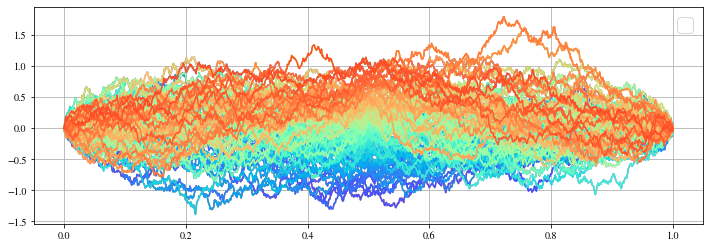

In [19]:
tn = np.linspace(0, 1, 1001)
nsim = 100
X = sample_true_bridge(tn, nsim)


ind = np.argsort(X[len(tn) // 2])
X = X[:, ind]

# Нормализуем eta в диапазон [0, 1] для цветовой карты
colors = rainbow(np.linspace(0.1, 0.9, nsim))

# Создаем график
fig = plt.figure(figsize=(12, 4))
#plt.title(r"$dX_t =a(t)\cdot X_t \cdot dt + dB_t$", fontsize=20)
plt.plot(tn, X)
for i in range(len(X[-1])):
    plt.plot(tn, X[:, i], color=colors[i], alpha=1)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
fig.tight_layout()
fig.savefig("../2_figs/BrownianBridge.png")